In [1]:
import cv2
import numpy as np

In [2]:
def process_img(img):
    #Coversion to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Bilateral filtering
    blur = cv2.bilateralFilter(gray,9,75,75)
    
    #Adative Thresholding
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    
    #Noise Removal
    closing = cv2.morphologyEx(th3,cv2.MORPH_CLOSE,None,iterations = 2)
    
    #Dilation
    dilation = cv2.dilate(closing,None,iterations = 1)
    
    
    #Threshold
    ret, res = cv2.threshold(dilation, 0, 255,  cv2.THRESH_BINARY_INV)
    
    
    return res

In [3]:
def process_img_secondary(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),19)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res

# Testing preprocessing Methods

In [9]:
img = cv2.imread("../Testing.jpg")
type(img)

numpy.ndarray

In [10]:
import matplotlib.pyplot as plt

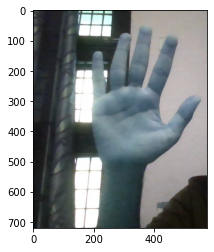

In [11]:
plt.imshow(img)

In [12]:
img1 = process_img(img)
img2 = process_img_secondary(img)

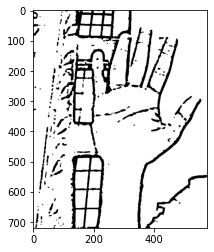

In [13]:
plt.imshow(img1,'gray')

In [ ]:
plt.imshow(img2,'gray')